# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [83]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# Load in csv
bike_df = pd.read_csv("trip.csv")
bike_df.head(5)

/Users/jeffreycoen/anaconda/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


/Users/jeffreycoen/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


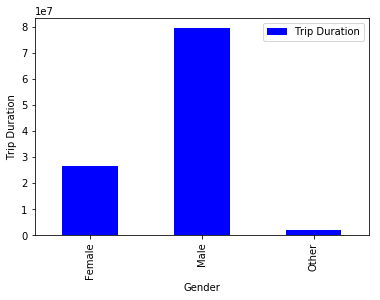

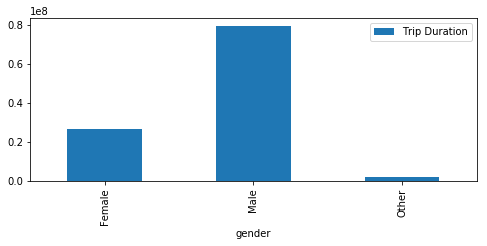

In [85]:
gender_df = (bike_df
      # group DF by gender column
      .groupby(['gender'], as_index = True)
      .tripduration
      # Perform calculations as directed by instructions
      .agg({'Trip Duration':'sum', 
           },index = ['Male', 'Female', 'Other']
          )
     )
gender_df = gender_df.drop('stoptime')

#plt.title("Trip Duration by Gender")

trip_plot = gender_df.plot(kind="bar", facecolor="blue")

plt.ylabel("Trip Duration")
plt.xlabel("Gender")
#trip_plot.set_xticklabels(x_labels, rotation=45)
# Use df.plot() to set up our bar graph
gender_df.plot(#x=gender_df["Trip Duration"], 
               kind="bar", figsize=(8, 3)#, title="Trip Duration"
)
plt.show()


# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

In [96]:
bikes_df = (bike_df
      # group DF by gender column
      .groupby(['bikeid', 'gender'], as_index = True)
      .tripduration
      # Perform calculations as directed by instructions
      .agg({'Trip Duration':'sum',  
           },index = ['Male', 'Female', 'Other']
          )
     )
bikes_df

/Users/jeffreycoen/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


Trip Duration
bikeid   gender               
SEA00001 Female      15876.665
         Male        41150.373
         Other         276.880
SEA00005 Female      20616.240
         Male        60386.328
         Other        1784.955
SEA00006 Female      20071.004
         Male        46584.453
         Other        1469.839
SEA00007 Female       9996.402
         Male        16618.213
         Other        1040.571
SEA00011 Female      16911.516
         Male        40854.898
         Other        2317.342
SEA00012 Female      17884.889
         Male        76757.529
         Other        2298.584
SEA00013 Female       9377.611
         Male        49872.575
         Other        1507.174
SEA00014 Female      15574.223
         Male        70181.764
         Other        2544.785
SEA00015 Female      10863.481
         Male        40440.420
         Other        2728.277
SEA00016 Female      12368.505
         Male        51441.085
         Other        2828.101
...                        ...
SEA00490 Other        4868.454
SEA00491 Female      29237.224
         Male       162091.655
         Other        2211.710
SEA00492 Female      66484.305
         Male       180546.517
         Other        1404.611
SEA00493 Female      50158.940
         Male       138445.280
         Other        1921.572
SEA00494 Female      51645.806
         Male       132281.606
         Other        1498.698
SEA00495 Female      59622.931
         Male       142282.889
         Other        1566.109
SEA00496 Female      30727.153
         Male       102098.440
SEA00497 Female      56352.484
         Male       189053.447
         Other        5875.059
SEA00498 Female      52958.284
         Male       182510.632
         Other        5912.523
SEA00499 Female      45974.851
         Male       160881.803
         Other        4712.502
SEA00500 Female      53074.638
         Male       207846.090
         Other        4123.578

[1458 rows x 1 columns]